In [21]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

messy_data = pd.read_csv('messy_population_data.csv')

In [79]:
# checking overall structure
messy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125718 entries, 0 to 125717
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   income_groups  119412 non-null  object 
 1   age            119495 non-null  float64
 2   gender         119811 non-null  float64
 3   year           119516 non-null  float64
 4   population     119378 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.8+ MB


In [20]:
# num of unique values per column
messy_data.nunique()

income_groups         8
age                 101
gender                3
year                169
population       114925
dtype: int64

In [13]:
# basic statistical summary
messy_data.describe()

,age,gender,year,population
count,119495.000000,119811.000000,119516.000000,1.193780e+05
mean,50.007038,1.578578,2025.068049,1.112983e+08
std,29.154144,0.590559,43.584951,1.265205e+09
min,0.000000,1.000000,1950.000000,2.100000e+01
25%,25.000000,1.000000,1987.000000,2.316023e+06
50%,50.000000,2.000000,2025.000000,7.145754e+06
75%,75.000000,2.000000,2063.000000,1.466388e+07
max,100.000000,3.000000,2119.000000,3.293043e+10


In [10]:
# taking closer look at year range
print(messy_data[messy_data['year'] > 2024].shape[0])

60211


In [35]:
# income group proportion
income_group_proportion = messy_data['income_groups'].value_counts(normalize=True) * 100
print("Proportion of income_groups:")
print(income_group_proportion)

# gender proportion
gender_proportion = messy_data['gender'].value_counts(normalize=True) * 100
print("\nProportion of gender:")
print(gender_proportion)


Proportion of income_groups:
income_groups
low_income                  23.810840
upper_middle_income         23.744682
high_income                 23.735470
lower_middle_income         23.718722
lower_middle_income_typo     1.270392
low_income_typo              1.260342
high_income_typo             1.235219
upper_middle_income_typo     1.224333
Name: proportion, dtype: float64

Proportion of gender:
gender
1.0    47.388804
2.0    47.364599
3.0     5.246597
Name: proportion, dtype: float64


In [23]:
# looking closer at the inconsistent category values
inconsistent_gender_values = [3]
inconsistent_income_values = [
    "low_income_typo", "upper_middle_income_typo", 
    "high_income_typo", "lower_middle_income_typo"
]
    
    # Count rows with inconsistent values in the 'gender' column
gender_inconsistent_count = messy_data['gender'].isin(inconsistent_gender_values).sum()
    
    # Count rows with inconsistent values in the 'income_groups' column
income_inconsistent_count = messy_data['income_groups'].isin(inconsistent_income_values).sum()
    
    # Output the results
print(f"Number of rows with inconsistent 'gender' values: {gender_inconsistent_count}")
print(f"Number of rows with inconsistent 'income_groups' values: {income_inconsistent_count}")
    


Number of rows with inconsistent 'gender' values: 6286
Number of rows with inconsistent 'income_groups' values: 5959


In [78]:
# number of duplicates 
print("Num of duplicated rows:", messy_data.duplicated().sum())

# looking at which rows are duplicated
duplicates = messy_data.duplicated(keep=False)
duplicate_indices = messy_data[duplicates].index

#print(duplicate_indices.tolist()[:5])

index_of_interest = 138
row_of_interest = messy_data.loc[index_of_interest]
duplicates = messy_data[messy_data.eq(row_of_interest).all(axis=1)]

print(duplicates)


Num of duplicated rows: 2950
       income_groups  age  gender    year  population
138      high_income  0.0     1.0  2088.0   5657492.0
124472   high_income  0.0     1.0  2088.0   5657492.0


In [7]:
# missing values
print("\nNum of missing values per column: ")
print(messy_data.isnull().sum())

print("\nNum of rows with at least 1 NA: ")
print(messy_data[messy_data.isna().any(axis=1)].shape[0])


Num of missing values per column: 
income_groups    6306
age              6223
gender           5907
year             6202
population       6340
dtype: int64

Num of rows with at least 1 NA: 
28079


In [61]:
# identifying potential outliers
Q1 = messy_data['population'].quantile(0.25)
Q3 = messy_data['population'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = messy_data[(messy_data['population'] < lower_bound) | (messy_data['population'] > upper_bound)]

print("Num of outliers in population column:", outliers.shape[0])

Num of outliers in population column: 2252
33185676.75


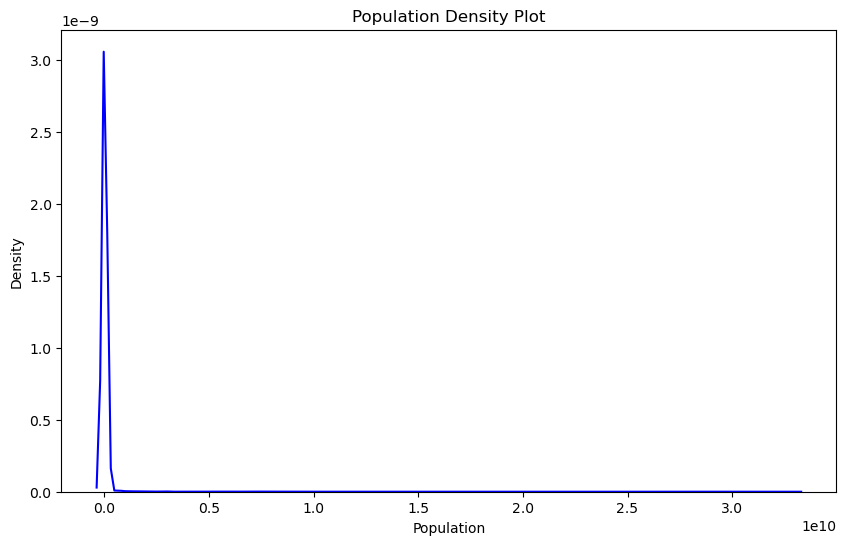

In [22]:
# checking distribution using KDE

plt.figure(figsize=(10, 6))
sns.kdeplot(messy_data['population'].dropna(), color='blue')
plt.title('Population Density Plot')
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()
